In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
from __future__ import division
from scipy.stats import t

Exercise 1 (Plotting hand shapes). Plot one of the hands by plotting the landmark points and interpolating between subsequent landmark points.
Next, plot all the hands on top of each other. Can you see any dataset tendencies from this plot? Deliverables. A plot of a hand, a plot of many hands, and a one-liner.

In [2]:
shapes = np.loadtxt('all/shapes/shapes.txt')


shapes.txt contains the subset of hands used for the note 
alls formatet as xxxyyy, each is 56 points i.e. 112 rows 
and one column per shape, 40 shapes. 

Points are normalized w.r.t. to the height of the image.
I.e. to obtain pixel coordinates multiply x and y with 600.

Ordering w.r.t. to the images is alphanumeric.

In [3]:
#shapes = np.ndarray.transpose(shapes)
shapes_x = shapes[0:56,:]
shapes_y = shapes[56:200,:]

/Users/avalee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
/Users/avalee/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/Users/avalee/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


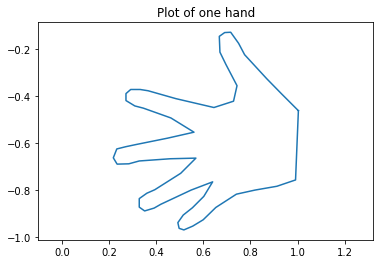

In [4]:
def plothand(hand, **kwargs):
    x = hand[range(0,56)]
    x = np.append(x, x[0])
    y = -hand[range(56,112)] # 68*2 + 10?
    y = np.append(y,y[0])
    #plt.plot(x[1:15], y[1:15])
    
    """their solution"""
    #handx = data[0:55,0]
    #handy = data[55:111,0]
    #plt.plot(handx,handy)
    
    
    plt.hold(True)
    plt.plot(x,y, **kwargs)
    #x1 = np.concatenate([x[range(0,56)],x[range(0,56)]])
    #plt.plot(np.concatenate([x[range(0, 56)],x[range(0,56)]]), np.concatenate([y[range(0,56)],y[range(0,56)]]))
    #plt.plot(x[range(38,45)], y[range(38,45)])
    #plt.plot(np.concatenate([x[range(27,31)], x[range(27,28)]]), np.concatenate([y[range(27,31)], y[range(27,28)]]))
    #plt.plot(np.concatenate([x[range(32, 36)], x[range(32, 33)]]), np.concatenate([y[range(32, 36)], y[range(32, 33)]]))
    #plt.plot(np.concatenate([x[range(21, 27)], x[range(21, 22)]]), np.concatenate([y[range(21, 27)], y[range(21, 22)]]))
    #plt.plot(np.concatenate([x[range(14, 20)], x[range(14, 15)]]), np.concatenate([y[range(14, 20)], y[range(14, 15)]]))
    #plt.scatter(np.concatenate([x[range(46, 48)], x[range(55, 56)]]), np.concatenate([y[range(46, 48)], y[range(55,56)]]))
    plt.axis('equal')   
plt.title("Plot of one hand")
plothand(shapes[:,0])


/Users/avalee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
/Users/avalee/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/Users/avalee/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


IndexError: index 40 is out of bounds for axis 1 with size 40

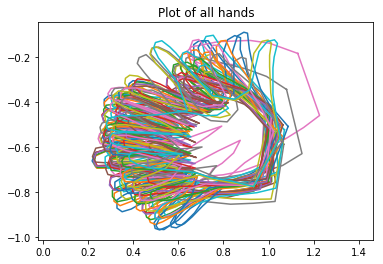

In [5]:
plt.title('Plot of all hands')
for i in range (0,55):
    plothand(shapes[:,i])
    """their solution"""
    #handx = data[0:55,i]
    #handy = data[55:111,i]
    #plt.plot(handx,handy)



Exercise 2 (Performing PCA).
<br>
<b>a) Implement PCA using the supplied template function pca.py. Your function should return i) unit vectors spanning the principal components, ii) the variance captured by each of these components. Upload your code in the automatic code checking system.</b>
<br><br>
b) Perform PCA on the dataset. Remember that each PC corresponds to an eigenvector of the covariance matrix, and that the corresponding eigenvalue corresponds to the variance of the data in the direction of the eigenvector. Make a plot of variance versus PC, where you should see the variance stabilizing (capturing primarily noise).<br><br>
You can determine the cumulative normalized variance by normalizing the variance along all PCs such that the sum of all variances is 1, and then capture how large a proportion of the variance is described by the first, second, etc PC. Plot the cumulative variance versus the number of used PCs. How many PCs (dimensions) do you need to capture 90% of the variance in your dataset? 95%?<br><br>
Deliverables. a) Uploaded code and b) Plot of variance versus PC; plot of cumulative variance versus PC; the numbers of dimensions needed to capture 90% and 95%.

In [6]:
#perform PCA on dataset
# input: datamatrix as loaded by numpy.loadtxt('shapes.txt')
# output:  1) the eigenvalues in a vector (numpy array) in descending order
#          2) the unit eigenvectors in a matrix (numpy array) with each column being an eigenvector (in the same order as its associated eigenvalue)
#
# note: make sure the order of the eigenvalues is descending, and the eigenvectors have the same order as their associated eigenvalues
def pca(data):
    matrix = np.cov(data)
    evals, evecs = np.linalg.eig(matrix)
    #from http://stackoverflow.com/questions/8092920/sort-eigenvalues-and-associated-eigenvectors-after-using-numpy-linalg-eig-in-pyt
    idx = evals.argsort()[::-1] #sort in descending order
    evals_desc = evals[idx]
    evecs_desc = evecs[:,idx]
    return evals_desc, evecs_desc
    pass
    """their solution"""
    #centre data (x - mean(x))
        #meanhand = np.mean(data,1)
        #rep_meanhand = np.transpose(np.tile(meanhand, (40,1))) #since dimensions have to match
        #c_data = data - rep_meanhand
        
    #pca - 1) do covariance 2) then apply np.linalg.eig fn => essentially only one line
        #cov = np.cov(c_data)
        #evals, evecs = np.linalg.eig(cov)
        
    #above gives complex numbers therefore need real parts of eigenvalues and eigenvectors
        #common in programming
        #evals_r = np.real(evals)
        #evecs_r = np.real(evecs)
        
    #sort the eigenvalues
        #idx = np.argsort(evals_r) #sorts with indices in ascending order
    #want descending order
        #idx = np.flipud(idx)
    #evals_desc = evals[idx]
    #evecs_desc = evecs[:,idx]
    
    #check what the fn does => do fn? e.g. np.flipud?
        


/Users/avalee/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5,1,'Variance versus PC')

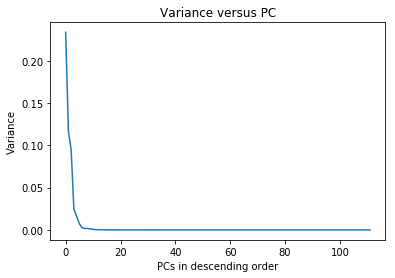

In [7]:
matrix = np.cov(shapes)
evals, evecs = np.linalg.eig(matrix)
plt.plot(evals)
plt.xlabel('PCs in descending order')
plt.ylabel('Variance')
plt.title('Variance versus PC')

/Users/avalee/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5,1,'Cumulative variance versus PC')

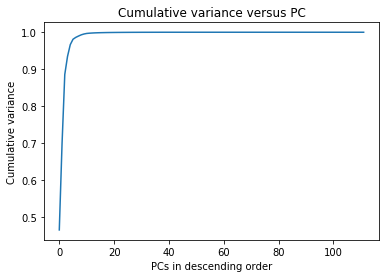

In [8]:
c_var = np.cumsum(evals/np.sum(evals))
plt.plot(c_var)
plt.xlabel('PCs in descending order')
plt.ylabel('Cumulative variance')
plt.title('Cumulative variance versus PC') #percentage of variance captured by first k PCs

In [9]:
c_var[0:10]

array([ 0.46493104 +5.70085803e-33j,  0.69717955 +8.54862608e-33j,
        0.88570064 +1.08602204e-32j,  0.93457879 +1.14595511e-32j,
        0.96635477 +1.18491795e-32j,  0.98101685 +1.20289619e-32j,
        0.98605850 +1.20907812e-32j,  0.98967948 +1.21351807e-32j,
        0.99298398 +1.21756996e-32j,  0.99525651 +1.22035648e-32j])

4 for 90% and 5 for 95%

Exercise 3. <br> Now, you should visualize the variance of the hand-data by plotting some instances of the first three PCs. That is, if the mean of the data is given by m, you are going to plot the ”hands” <br>
m−2σ1e1 m−σ1e1 m m+σ1e1 m+2σ1e1 m−2σ2e2 m−σ2e2 m m+σ2e2 m+2σ2e2 m−2σ3e3 m−σ3e3 m m+σ3e3 m+2σ3e3.<br>
where the e1, e2 and e3 are the eigenvectors defining the first three PCs, and σ1, σ2 and σ3 denote the standard deviation of the data projected onto each of the first three PCs.<br>
Plot the five hands corresponding to each PC in a single plot, and illustrate the temporal devel- opment with a changing color. This can, for instance, be done by importing a colormap with blues = plt.get cmap(’Blues’), where blues(x) returns a different shade of blue for every number x between 0 and 1.<br>
Describe the variance captured by the three components.<br>
Deliverables. Three plots with sequences of hands showing the variance. A description of the three components.


/Users/avalee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  # This is added back by InteractiveShellApp.init_path()
/Users/avalee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
/Users/avalee/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/Users/avalee/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
/Users/avalee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: pyplot

'their solution'

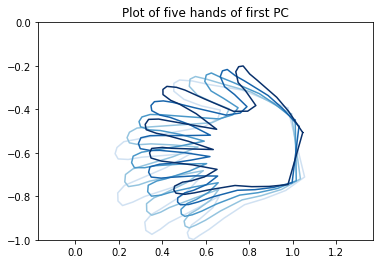

In [10]:
meanshapes = np.mean(shapes,1)
e1 = evecs[:,0]
std1 = np.sqrt(evals[0])


blues = plt.get_cmap('Blues')

shapes_along_pc = np.zeros((5,112))
plt.title("Plot of five hands of first PC")
for i in range(5):
    shapes_along_pc[i,:]=meanshapes+(i-3)*std1*e1
    plothand(shapes_along_pc[i], color = blues((i+1)/5))
    plt.xlim(0, 1.2)
    plt.ylim(-1, 0)
    plt.hold(True)
    
"""their solution"""
#plotting first PC
#for i in range (-2,2):
    #toplot = meanhand + i*std1*e1
    #toplotx = toplot[0:55]
    #toploty = toplot[56:111]
    #blueshade = blues (float(0.2)*(3-float(i)))
        #0, 0.2, 0.4, 0.8, 1
    #plt.plot(toplotx, toploty, colour = blueshade)

/Users/avalee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """
/Users/avalee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
/Users/avalee/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/Users/avalee/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
/Users/avalee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consi

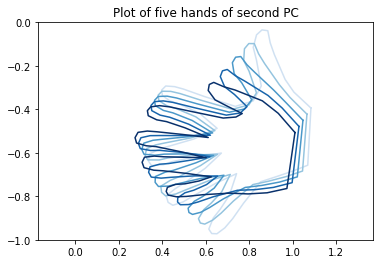

In [11]:
e2 = evecs[:,1]
std2 = np.sqrt(evals[1])
plt.title("Plot of five hands of second PC")
for i in range(5):
    shapes_along_pc[i,:]=meanshapes+(i-3)*std2*e2
    plothand(shapes_along_pc[i], color = blues((i+1)/5))
    plt.xlim(0, 1.2)
    plt.ylim(-1, 0)
    plt.hold(True)

/Users/avalee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """
/Users/avalee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
/Users/avalee/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/Users/avalee/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
/Users/avalee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consi

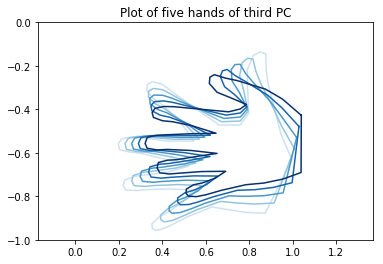

In [12]:
e3 = evecs[:,2]
std3 = np.sqrt(evals[2])
plt.title("Plot of five hands of third PC")
for i in range(5):
    shapes_along_pc[i,:]=meanshapes+(i-3)*std3*e3
    plothand(shapes_along_pc[i], color = blues((i+1)/5))
    plt.xlim(0, 1.2)
    plt.ylim(-1.0, 0)
    plt.hold(True)

Comment on the direction of variation
-> The first 2 components seem to correspond to vertical hand waving, the third flexing the fingers

Implement a k-nearest neighbor classifier (k-NN) using the supplied template function knn.py which takes as input a training set, a test set, a set of training labels, and a parameter k, and outputs a vector of labels for the test set.<br>
http://www.slideshare.net/pierluca.lanzi/machine-learning-and-data-mining-13-nearest-neighbor-and-bayesian-classifiers


In [13]:
#need to use train set to classify nearest neighbours and use this to predict labels for test set

In [15]:
from collections import Counter
train = np.loadtxt('data_handin2/parkinsonsTrain.dt')
test = np.loadtxt('data_handin2/parkinsonsTest.dt')
trainlabels = train[:,22]
#or
#trainlabels = train[:,-1]
train = train[:,0:22]
test = test[:,0:22]
#or
#train = train[:,0:-1]
#test = test[:,0:-1]

# input: train: 1) train data (without labels) in the form of a N by d numpy array, where N is the number of training data points and d is the number of dimensions
#               2) test: test data (without labels) in the form of a M by d numpy array, where M is the number of test data points and d is the number of dimensions
#               3) trainlabels: labels for training data in the form of a N by 1 numpy vector, where N is the number of training data points
#               4) k: paramater k
# output:1) distance matrix (numpy array) between test and training samples 
#        2) vector (numpy array) consisting of the predicted classes for the test data
#
# note: the labels should **not** be part of the train/test data matrices!
def knn(train, test, trainlabels, k):
    samples = ([train], trainlabels)
    
    #from textbook
    def majority_vote(labels):
        """assumes that labels are ordered from nearest to farthest"""
        vote_counts = Counter(labels)
        winner, winner_count = vote_counts.most_common(1)[0]
        num_winners = len([count
                            for count in vote_counts.values()
                            if count == winner_count])
        if num_winners == 1:
            return winner # unique winner, so return it
        else:
            return majority_vote(labels[:-1]) # try again without the far    
    #----------------------
    
    #compute Euclidean distances of test samples from each training samples
    """their solution
    def dist_m(set1,set2):
        set1num, dim = set1.shape
        set2num, dim = set2.shape
        D = np.zeros((set1num, set2num))
        for i in range(set1num): #train
            for j in range(set2num): #test
                D[i,j] = np.linalg.norm(set1[i,:]-set2[j,:])
                
        return D
    
    dmat = dist_m(test,train)
    
    #sorting the distances
    sorted_indices = np.argsort(dmat) #sort distances into ascending order
    trainlabels = 2*(trainlabels - 0.5) #change labels to sum up all the labels so if -1 1 1 1 -1 then 1>0
    sorted_classes = trainlabels[sorted_indices] #sorted labels
    
    if k ==1:
        pred_classes = sorted_classes[:,0]
    else:
        pred_classes = np.sign(np.sum(sorted_classes[:,range(k)],1))
        #bigger or smaller than 0 if bigger then 1, if smaller then 0
    
    pred_classes = pred_classes/2+0.5 #going back to 0,1 label"""
        #compute Euclidean distances of test samples from each training samples
    def distances(x, y):
        dist = 0
        for i in range(len(x)):
            squared_dist = (x[i] - y[i])**2
            dist += squared_dist
        return math.sqrt(dist)
    
    dist = []
    for a in test:
        row_dist = []
        for b in train:
            row_dist.append(distances(a,b))
        dist.append(row_dist)
    dist = np.array(dist)
    dist = dist.T
    r, c = dist.shape
    

    #sort distance in order for each test sample (each column in distance matrix)
    predicted_labels_list = []
    for i in range(0,c):
        test_i = dist[:,i]
        test_i_distance_sorted = np.argsort(test_i) #indices of distances sorted in ascending order
        #cut this off at the k-th nearest label to find the corresponding indices in trainlabels
        k_nearest_labels = trainlabels[test_i_distance_sorted[:k]]
        #use this to vote on the label of the k nearest neighbours of test sample
        predicted_labels_list.append(majority_vote(k_nearest_labels))
    predicted_labels = np.array(predicted_labels_list)
    dist = dist.T
    return predicted_labels
    pass

In [16]:
train = np.loadtxt('data_handin2/parkinsonsTrain.dt')
test = np.loadtxt('data_handin2/parkinsonsTest.dt')
testlabels = test[:,22]
trainlabels = train[:,22]
train_data = train[:,0:22]
test_data = test[:,0:22]
k=5

knn(train_data, test_data, trainlabels, k)

array([ 1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  0.,  1.,  1.,  1.,  1.])

In [19]:
train = np.loadtxt('data_handin2/parkinsonsTrain.dt')
test = np.loadtxt('data_handin2/parkinsonsTest.dt')
train = train[:,0:22]
test = test[:,0:22]

# input: 1) train: train data in the form of a N by d numpy array, where N is the number of training data points and d is the number of dimensions
#        2) test: test data in the form of a M by d numpy array, where M is the number of test data points and d is the number of dimensions    
# output: 1) centered and normalized train data as a numpy array
#         2) centered and normalized test data as a numpy array 
def cent_and_norm(train, test):
     #this part is from textbook
    def dot(v, w):
        """v_1 * w_1 + ... + v_n * w_n"""
        return sum(v_i * w_i for v_i, w_i in zip(v, w))
    def sum_of_squares(v):
        """v_1 * v_1 + ... + v_n * v_n"""
        return dot(v, v)
    def de_mean(x):
            """translate x by subtracting its mean (so the result has mean 0)"""
            x_bar = np.mean(x)
            return [x_i - x_bar for x_i in x]
    def variance(x):
        """assumes x has at least two elements"""
        n = len(x)
        deviations = de_mean(x)
        return sum_of_squares(deviations) / (n) #n for population variance?
    def std_dv(x):
        return math.sqrt(variance(x))
    #--------------------------------
    
    #find mean of each column and subtract a matrix using these columns with same dimensions as train and data to centre
    def mean_cols(M):
        r, d = M.shape
        mean_cols = []
        for i in range(0,d):
            mean_cols.append(np.mean(M[:,i]))
        return np.array(mean_cols)

    #repeat with variance
    def var_cols(M):
        r, d = M.shape
        var_cols = []
        for i in range(0,d):
            var_cols.append(std_dv(M[:,i]))
        return np.array(var_cols)
    
    def std_matrix(A):
        r, d = A.shape
        mean_train = [mean_cols(train),]*r
        var_train = [var_cols(train),]*r
        return (A - mean_train)/var_train
    #don't know why this was needed
    h,v = test.shape
    mean_test = [mean_cols(test),]*h
    var_test = [mean_cols(test),]*h
    
    std_train = std_matrix(train)
    std_test = std_matrix(test)
    
    return std_train, std_test
    pass


In [20]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=k)
train_cn, test_cn = cent_and_norm(train_data, test_data)
neigh.fit(train_cn, trainlabels)
testpredicted = (neigh.predict(test_cn))
k_testpredicted = knn(train_cn, test_cn, trainlabels, k)
#print k_testpredicted
if (testpredicted - k_testpredicted).any() == 0:
    print ("Yes")
else:
    print (testpredicted - k_testpredicted)

Yes


In [29]:
#b) Center and normalize the training and test data in the Parkinsons dataset,
#and repeat the classification from Exercise 4.
#b) Updated training and test results for the k-NN classifier for k = 1, 3, 5.

train = np.loadtxt('data_handin2/parkinsonsTrain.dt')
test = np.loadtxt('data_handin2/parkinsonsTest.dt')
testlabels = test[:,22]
trainlabels = train[:,22]
train_data = train[:,0:22]
test_data = test[:,0:22]
train_cn, test_cn = cent_and_norm(train_data, test_data)
#classifier on test data
knnontest_accuracy = []
for j in xrange(1,6,2):
    predicted_labels = knn(train_cn, test_cn, trainlabels, j)
    #print predicted_labels
    #test = np.loadtxt('data_handin2/parkinsonsTest.dt')
    #testlabels = test[:,22]
    #print test_labels
    compare_labels = predicted_labels - testlabels
    #print compare_labels
    wrong_labels = filter(lambda a: a != 0, list(compare_labels))
    #print wrong_labels
    no_wrong_labels = len(wrong_labels)
    #print no_wrong_labels
    error = no_wrong_labels/len(trainlabels)
    accuracy = 1-error
    knnontest_accuracy.append(accuracy)
print xrange(1,6,2)[np.argmax(knnontest_accuracy)]
print knnontest_accuracy

#classifier on train data
knnontrain_accuracy = []
for j in xrange(1,6,2):
    predicted_labels = knn(train_cn, train_cn, trainlabels, j)
    #print predicted_labels
    #print test_labels
    compare_labels = predicted_labels - trainlabels
    #print compare_labels
    wrong_labels = filter(lambda a: a != 0, list(compare_labels))
    #print wrong_labels
    no_wrong_labels = len(wrong_labels)
    #print no_wrong_labels
    error = no_wrong_labels/len(testlabels)
    accuracy = 1-error
    knnontrain_accuracy.append(accuracy)
print knnontrain_accuracy

"""for k in range (1,6,2):
    dmat, pred_classes = knn(train_norm, test_norm, trainlabels, k)
    error_num = np.sum(abs(testlabels - pred_classes)/2)
    error_perc = error_num/testnum)
    print(error_perc)"""

3
[0.8775510204081632, 0.9387755102040817, 0.8979591836734694]
[1.0, 0.9587628865979382, 0.9072164948453608]


'for k in range (1,6,2):\n    dmat, pred_classes = knn(train_norm, test_norm, trainlabels, k)\n    error_num = np.sum(abs(testlabels - pred_classes)/2)\n    error_perc = error_num/testnum)\n    print(error_perc)'

In [24]:
#need to use k-folds cross validation iterator to split rand_perm into folds
#then use these splitted rand_perm indices to separate train data into train and test train

    #for each fold, use train and test indices from each fold and use knn classifier on this with k in range 1-25 increments of 2
        #for each k, calculate the classification error by checking labels against test train set labels
            #so need to find a way to compare the labels and report number of non-duplicates?
            #then output this as an array (a row of 13 values for each fold)
#need to stack each array to make a matrix of 5*13 = folds*k errors
#average each column
#find lowest error in the averages

In [35]:
from sklearn.cross_validation import KFold
from collections import Counter

def knn(train, test, trainlabels, k):
    samples = ([train], trainlabels)
    
    #from textbook
    def majority_vote(labels):
        """assumes that labels are ordered from nearest to farthest"""
        vote_counts = Counter(labels)
        winner, winner_count = vote_counts.most_common(1)[0]
        num_winners = len([count
                            for count in vote_counts.values()
                            if count == winner_count])
        if num_winners == 1:
            return winner # unique winner, so return it
        else:
            return majority_vote(labels[:-1]) # try again without the far    
    #----------------------
    
    #compute Euclidean distances of test samples from each training samples
    def distances(x, y):
        dist = 0
        for i in range(len(x)):
            squared_dist = (x[i] - y[i])**2
            dist += squared_dist
        return math.sqrt(dist)
    
    dist = []
    for a in test:
        row_dist = []
        for b in train:
            row_dist.append(distances(a,b))
        dist.append(row_dist)
    dist = np.array(dist)
    dist = dist.T
    r, c = dist.shape
    

    #sort distance in order for each test sample (each column in distance matrix)
    predicted_labels_list = []
    for i in range(0,c):
        test_i = dist[:,i]
        test_i_distance_sorted = np.argsort(test_i) #indices of distances sorted in ascending order
        #cut this off at the k-th nearest label to find the corresponding indices in trainlabels
        k_nearest_labels = trainlabels[test_i_distance_sorted[:k]]
        #use this to vote on the label of the k nearest neighbours of test sample
        predicted_labels_list.append(majority_vote(k_nearest_labels))
    predicted_labels = np.array(predicted_labels_list)
    dist = dist.T
    return predicted_labels

train = np.loadtxt('data_handin2/parkinsonsTrain.dt')
trainlabels = train[:,22]
train = train[:,0:22]
test = test[:,0:22]
rand_perm = np.random.permutation(len(trainlabels))

# input:  1) training data in the form of a N by d numpy array, where N is the number of training data points and d is the number of dimensions
#         2) training labels in the form of a N by 1 numpy vector, where N is the number of training data points
#         3) a random permutation of entries as a numpy array, e.g. np.random.permutation(len(trainlabels))
# output: 1) the optimal k
#         2) an error matrix (numpy array) of size (5,13) where column i consists of the accuracy for the 5 folds for k=i
#
# The random-permuted vector rand_perm should be used for generating 5 folds, where the first fold consists of the first N/5 elements from rand_perm, rounded up to the nearest integer; the second fold consists of the next N/5 elements, etc, and the fifth fold consists of the remaining elements
# note: to create the folds consider: KFold(len(trainlabels), n_folds=5) from sklearn.cross_validation (http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html)
# note: once you have the folds use the rand_perm vector to get the random indices in the training data and labels
def cv(train, trainlabels, rand_perm):
    
    #based on http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html
    kf = KFold(len(trainlabels), n_folds=5)
    X = train
    y = trainlabels
    
    error_lists = []
    index_list = list(kf)
    for i in range (0, 5):
        train_index, test_index = index_list[i]
        #X_train, X_test = X[train_index], X[test_index]
        #y_train, y_test = y[train_index], y[test_index]
        test_indices = rand_perm[test_index]
        train_indices = rand_perm[train_index]
        
        #pick out rows corresponding to those indices
        train_data = train[train_indices,:] 
        test_data = train[test_indices,:]
        fold_error = []
        for j in xrange(1,26,2):
            predicted_labels = knn(train_data, test_data, trainlabels, j)
            #print predicted_labels
            test_labels = trainlabels[test_indices]
            #print test_labels
            compare_labels = predicted_labels - test_labels
            #print compare_labels
            wrong_labels = filter(lambda a: a != 0, list(compare_labels))
            #print wrong_labels
            no_wrong_labels = len(wrong_labels)
            #print no_wrong_labels
            error = no_wrong_labels/len(test_labels)
            #print error
            fold_error.append(error)
        error_lists.append(fold_error)
        error_matrix = np.array(error_lists)
    print error_matrix
    
    r, c = error_matrix.shape
    k_error_list = []
    for x in range(0,c):
        k_error = error_matrix[:,x]
        k_error_avg = np.mean(k_error)
        k_error_list.append(k_error_avg)
    k_best_index = np.argmin(k_error_list)
    #print k_error_list
    k_values = np.arange(1,26,2)
    #print k_values
    #print k_best_index
    k_best = k_values[k_best_index]
    #print k_best
    
    return k_best
    pass


In [4]:
import numpy as np
from sklearn import cross_validation
from sklearn import datasets
from sklearn import svm
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score

train = np.loadtxt('data_handin2/parkinsonsTrain.dt')
test = np.loadtxt('data_handin2/parkinsonsTest.dt')
trainlabels = train[:,22]
train_data = train[:,0:22]
test_data = test[:,0:22]

cv = cross_validation.KFold(len(trainlabels), n_folds = 5)
k_scores = []
for j in xrange(1,10,2):
    knnC = KNeighborsClassifier(n_neighbors=j)
    scores = cross_validation.cross_val_score(knnC, train_data, trainlabels, cv=5)
    k_scores.append(scores)
    print k_scores
k_scores = np.array(k_scores)
print k_scores.mean(axis=0)


[array([ 0.76190476,  0.8       ,  0.89473684,  0.84210526,  0.78947368])]
[array([ 0.76190476,  0.8       ,  0.89473684,  0.84210526,  0.78947368]), array([ 0.76190476,  0.75      ,  0.84210526,  0.73684211,  0.78947368])]
[array([ 0.76190476,  0.8       ,  0.89473684,  0.84210526,  0.78947368]), array([ 0.76190476,  0.75      ,  0.84210526,  0.73684211,  0.78947368]), array([ 0.71428571,  0.7       ,  0.89473684,  0.78947368,  0.78947368])]
[array([ 0.76190476,  0.8       ,  0.89473684,  0.84210526,  0.78947368]), array([ 0.76190476,  0.75      ,  0.84210526,  0.73684211,  0.78947368]), array([ 0.71428571,  0.7       ,  0.89473684,  0.78947368,  0.78947368]), array([ 0.76190476,  0.7       ,  0.89473684,  0.84210526,  0.78947368])]
[array([ 0.76190476,  0.8       ,  0.89473684,  0.84210526,  0.78947368]), array([ 0.76190476,  0.75      ,  0.84210526,  0.73684211,  0.78947368]), array([ 0.71428571,  0.7       ,  0.89473684,  0.78947368,  0.78947368]), array([ 0.76190476,  0.7       , 